In [4096]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Reading of the CSV file into a dataframe.

In [4097]:
train_csv = pd.read_csv('train.csv')
train_csv

,Feature1,Feature2,Feature3,Feature4,Label
0,26.303954,True,59.919036,126.853479,170.361411
1,19.646076,False,34.504636,108.363933,29.897337
2,36.983463,False,98.503396,5.085491,373.460027
3,36.516512,False,38.418101,1.173449,26.696336
4,28.734387,False,99.286184,29.123061,332.682539
...,...,...,...,...,...
235,31.769066,False,189.379552,0.002523,1277.121058
236,28.015702,True,85.468516,61.646937,304.899057
237,31.477720,False,0.360471,19.738584,26.351808
238,27.198042,False,48.290593,18.924597,102.047530


PREPROCESSING:
1) Removing duplicate rows.
2) The columns where the null value percentage is less than 5% we should remove the rows where these null values are present.
3) The columns where the null value percentage is more than equal to 5% and less than 30%, we should use imputation techniques to remove null values.
4) The columns where the null value percentage is more than equal to 30%, we should drop the entire columns because a large amount of the columns are null values.

In [4098]:
train_csv.drop_duplicates(inplace=True)

In [4099]:
train_csv

,Feature1,Feature2,Feature3,Feature4,Label
0,26.303954,True,59.919036,126.853479,170.361411
1,19.646076,False,34.504636,108.363933,29.897337
2,36.983463,False,98.503396,5.085491,373.460027
3,36.516512,False,38.418101,1.173449,26.696336
4,28.734387,False,99.286184,29.123061,332.682539
...,...,...,...,...,...
235,31.769066,False,189.379552,0.002523,1277.121058
236,28.015702,True,85.468516,61.646937,304.899057
237,31.477720,False,0.360471,19.738584,26.351808
238,27.198042,False,48.290593,18.924597,102.047530


In [4100]:
train_csv.isna().sum()

Feature1     9
Feature2     0
Feature3     0
Feature4    13
Label        0
dtype: int64

In [4101]:
null_value_percentages=(train_csv.isna().sum()/train_csv.shape[0])*100
null_value_percentages

Feature1    3.750000
Feature2    0.000000
Feature3    0.000000
Feature4    5.416667
Label       0.000000
dtype: float64

In [4102]:
rows_to_drop=null_value_percentages[null_value_percentages<5].sort_values(ascending=False)
rows_to_drop

Feature1    3.75
Feature2    0.00
Feature3    0.00
Label       0.00
dtype: float64

In [4103]:
rows_to_drop = rows_to_drop.keys()
rows_to_drop

Index(['Feature1', 'Feature2', 'Feature3', 'Label'], dtype='object')

In [4104]:
for row in rows_to_drop:
	if(null_value_percentages[row]<3):
		train_csv.drop(labels=train_csv.index[train_csv[row].isna()],inplace=True)
train_csv

,Feature1,Feature2,Feature3,Feature4,Label
0,26.303954,True,59.919036,126.853479,170.361411
1,19.646076,False,34.504636,108.363933,29.897337
2,36.983463,False,98.503396,5.085491,373.460027
3,36.516512,False,38.418101,1.173449,26.696336
4,28.734387,False,99.286184,29.123061,332.682539
...,...,...,...,...,...
235,31.769066,False,189.379552,0.002523,1277.121058
236,28.015702,True,85.468516,61.646937,304.899057
237,31.477720,False,0.360471,19.738584,26.351808
238,27.198042,False,48.290593,18.924597,102.047530


OBSERVATION: There are 9 rows for which null value percentage is less than 5% and  more than 0%.

In [4105]:
columns_to_drop=null_value_percentages[null_value_percentages>30]
columns_to_drop

Series([], dtype: float64)

OBSERVATION: There are no columns for which null value percentage is more than 30%.
As there were no columns dropped, there are no chances of having duplicates.

In [4106]:
null_value_percentages=(train_csv.isna().sum()/train_csv.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
columns_to_impute=null_value_percentages.keys()
columns_to_impute

Index(['Feature1', 'Feature4'], dtype='object')

In [4107]:
for column in columns_to_impute:
	if(train_csv[column].dtype== object):
		print("Column: ",column,"\tCounts:\n", train_csv[column].value_counts(dropna=False))
		print("\n\n")

OBSERVATION: There are no categorical variables according to the code above. However, Feature2 is a categorical variable which has boolean values i.e. TRUE and FALSE. I will focus on Feature2 particularly.

In [4108]:
train_csv['Feature2'].isna().sum()

np.int64(0)

OBSERVATION: Thus, there are 0 null values in the column 'Feature2'.
It has TRUE or FALSE values. Thus, to convert the categorical variable into a numerical variable, I will assign TRUE = 1 and FALSE = 0.
All the categorical variables must be converted to numerical variables before finding the best model.

In [4109]:
# Using apply with a lambda function
train_csv['Feature2'] = train_csv['Feature2'].apply(lambda x: 1 if x == True else 0)
train_csv['Feature2']

0      1
1      0
2      0
3      0
4      0
      ..
235    0
236    1
237    0
238    0
239    0
Name: Feature2, Length: 240, dtype: int64

Now, all the categorical variables have been converted into numerical variables.
Now I have to handle columns where the null value percentage is more than 5% and less than 30%.

In [4110]:
null_value_percentages=(train_csv.isna().sum()/train_csv.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
null_value_percentages

Feature1    3.750000
Feature4    5.416667
dtype: float64

Mean imputation: Best for numerical data that is symmetrically distributed (i.e., normally distributed) without outliers. 
Median imputation: Best for numerical data that is skewed (non-symmetric) or contains outliers. 
Mode imputation: Best for categorical data or numerical data with discrete, frequently occurring values.

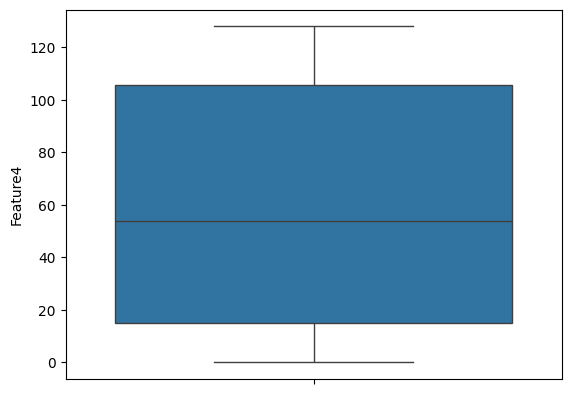

In [4111]:
# Feature 4 handling
sns.boxplot(train_csv['Feature4'])
plt.show()

As we can see there are no outliers in Feature4 and it is a numerical variable. Thus, I will impute the values using mean.

In [4112]:
mean_value = train_csv['Feature4'].mean()
train_csv['Feature4'] = train_csv['Feature4'].fillna(mean_value)
train_csv['Feature4'].isna().sum()

np.int64(0)

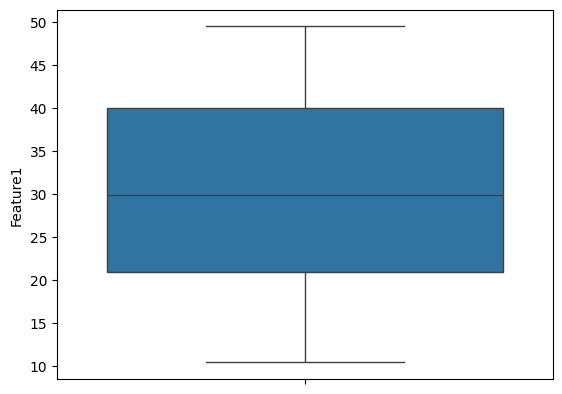

In [4113]:
# Feature 1 handling
sns.boxplot(train_csv['Feature1'])
plt.show()

As we can see there are no outliers in Feature1 and it is a numerical variable. Thus, I will impute the values using mean.

In [4114]:
mean_value = train_csv['Feature1'].mean()
train_csv['Feature1'] = train_csv['Feature1'].fillna(mean_value)
train_csv['Feature1'].isna().sum()

np.int64(0)

I will keep all the categorical variables as the initial columns and the numerical variables as the columns in the last.
This will help me to standardize and scale only the numerical variables.

In [4115]:
# Columns to swap
col1, col2 = 'Feature1', 'Feature2'

# Swap the columns
columns = list(train_csv.columns)  # Get the list of column names
col1_index, col2_index = columns.index(col1), columns.index(col2)  # Find the indices of the columns

# Swap the columns in the list
columns[col1_index], columns[col2_index] = columns[col2_index], columns[col1_index]

# Reorder DataFrame columns based on the modified list
train_csv = train_csv[columns]
train_csv

,Feature2,Feature1,Feature3,Feature4,Label
0,1,26.303954,59.919036,126.853479,170.361411
1,0,19.646076,34.504636,108.363933,29.897337
2,0,36.983463,98.503396,5.085491,373.460027
3,0,36.516512,38.418101,1.173449,26.696336
4,0,28.734387,99.286184,29.123061,332.682539
...,...,...,...,...,...
235,0,31.769066,189.379552,0.002523,1277.121058
236,1,28.015702,85.468516,61.646937,304.899057
237,0,31.477720,0.360471,19.738584,26.351808
238,0,27.198042,48.290593,18.924597,102.047530


Outlier detection and removal for each column

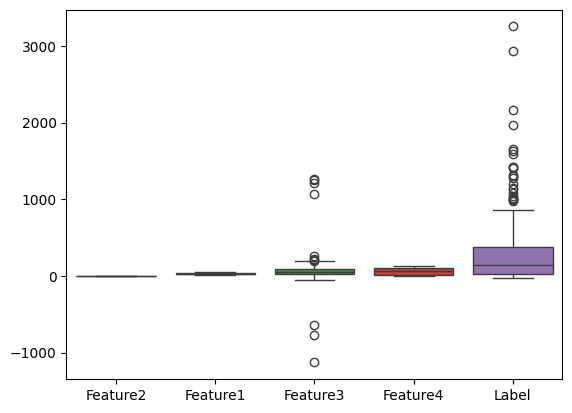

In [4116]:
sns.boxplot(train_csv)
plt.show()

As we can see, there are outliers in columns: Feature3 and Label. I will remove outliers only from Feature3.

In [4117]:
# q3=train_df["LotFrontage"].quantile(0.75)
# q1=train_df["LotFrontage"].quantile(0.25)
# inter_quartile_range=q3-q1
# upper_whisker=q3+inter_quartile_range*1.5
# lower_whisker=q1-inter_quartile_range*1.5
class Outlierremoval:
	def __init__(self, col):
		q1 = col.quantile(0.25)
		q3 = col.quantile(0.75)
		inter_quartile_range=q3-q1
		self.upper_whisker=q3+inter_quartile_range*1.5
		self.lower_whisker=q1-inter_quartile_range*1.5
  
	def remove(self, row):
		if(row<=self.upper_whisker and row>=self.lower_whisker):
			return row
		elif row < self.lower_whisker:
			return self.lower_whisker
		else:
			return self.upper_whisker

In [4118]:
remover = Outlierremoval(train_csv['Feature3'])
train_csv['Feature3'] = train_csv['Feature3'].apply(remover.remove)

Let us check what effect it has.

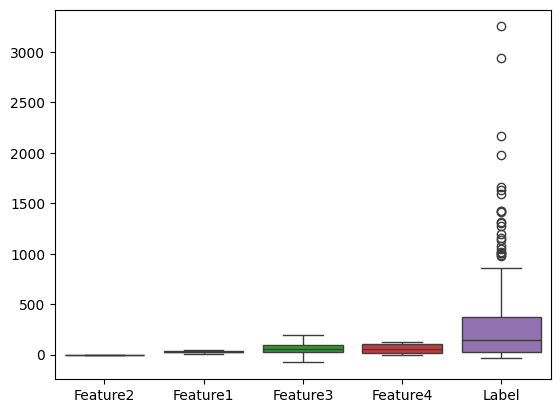

In [4119]:
sns.boxplot(train_csv)
plt.show()

Now, I will split the given data into the features and the label.

In [4120]:
X = train_csv.iloc[:,:-1]
Y = train_csv.iloc[:,-1]
print(X.head())
print(Y.head())

   Feature2   Feature1   Feature3    Feature4
0         1  26.303954  59.919036  126.853479
1         0  19.646076  34.504636  108.363933
2         0  36.983463  98.503396    5.085491
3         0  36.516512  38.418101    1.173449
4         0  28.734387  99.286184   29.123061
0    170.361411
1     29.897337
2    373.460027
3     26.696336
4    332.682539
Name: Label, dtype: float64


Splitting the data into 70% for training and 30% for testing with random seed as 42.

In [4121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print(X_train.head())
print(X_test.head())

     Feature2   Feature1   Feature3    Feature4
176         0  11.296965  38.502528  127.999842
150         0  23.942047  24.709862  105.614921
10          0  23.182720   4.104318   26.299836
201         0  28.602050  72.145468  124.407074
237         0  31.477720   0.360471   19.738584
     Feature2   Feature1   Feature3    Feature4
24          0  14.704274  11.581544   29.361669
6           1  32.740281  93.204872   57.660052
93          1  27.524875  29.485877   90.505813
109         1  25.133066  65.687114  125.685116
104         0  18.970723  24.541844   83.042466


The X_train should be normalized (fitted and transformed). Then, using the same scaler we have to transform (only transform, not fit) the X_test.

In [4122]:
X_train_scaled = scaler.fit_transform(X_train.iloc[:, 1:])
X_test_scaled = scaler.transform(X_test.iloc[:, 1:])

# If you need to reassign back to the original DataFrame or join with unscaled data:
X_train.iloc[:, 1:] = X_train_scaled
X_test.iloc[:, 1:] = X_test_scaled

print(X_train.head())
print(X_test.head())

     Feature2  Feature1  Feature3  Feature4
176         0 -1.706986 -0.379505  1.511879
150         0 -0.562217 -0.630270  1.005605
10          0 -0.630959 -1.004901 -0.788246
201         0 -0.140343  0.232159  1.430622
237         0  0.119994 -1.072968 -0.936640
     Feature2  Feature1  Feature3  Feature4
24          0 -1.398519 -0.868957 -0.718997
6           1  0.234295  0.615042 -0.078979
93          1 -0.237860 -0.543437  0.663885
109         1 -0.454393  0.114739  1.459527
104         0 -1.012274 -0.633325  0.495089


Flatten the data for plotting.

In [4123]:
# Sort the data points for plotting

#np.argsort() takes 1D arrays
#returns indices that sort X_train in ascending order
# sorted_indices = np.argsort(X_train.flatten())

#X_train is sorted as per the indices
#Y_train is also sorted as per the same indices, so that X-Y values align
# X_train_sorted = X_train[sorted_indices]
# Y_train_sorted = Y_train[sorted_indices]

Model Training

In [4124]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)
print(regression.coef_)

print(regression.intercept_)

print(regression.get_params())

[ 20.24572378  86.205552   281.58935793 -24.09495158]
276.90744997024575
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


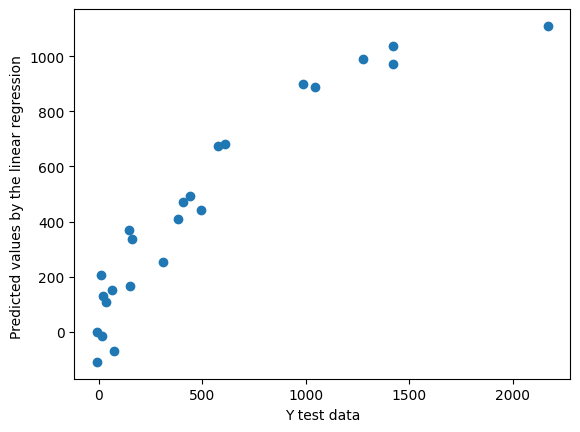

In [4125]:
reg_pred = regression.predict(X_test)

plt.scatter(x=Y_test, y=reg_pred)
plt.xlabel('Y test data')
plt.ylabel('Predicted values by the linear regression ')
# Plotting the prediction vs Y test data. It should ideally resemble y = x line.
plt.show()

Finding the residuals.

In [4126]:
residuals = Y_test - reg_pred
residuals

24      147.284960
6       -53.875433
93      -71.978803
109      53.435355
104      -7.719131
172    -178.868879
233     448.772663
86      -18.880378
9       157.980900
143     381.476219
45      102.275548
206    -197.289213
114     -97.879774
168      30.758993
113     -68.536109
230    -110.622504
185      88.548713
15     -219.754868
152     -26.658049
125      50.721740
127    1058.817950
19      -90.131577
235     288.707818
30      -65.123470
Name: Label, dtype: float64

Now, I will find the mean squared error, mean absolute error and the square root of mean squared error.

In [4127]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_squared_error(Y_test, reg_pred))
print(mean_absolute_error(Y_test, reg_pred))
print(np.sqrt(mean_squared_error(Y_test, reg_pred)))

74583.0866669568
167.33746031126765
273.09904186385717


R square and adjusted R square

In [4128]:
from sklearn.metrics import r2_score
score = r2_score(y_true=Y_test, y_pred=reg_pred)
print(score)

0.7724954481452083


In [4129]:
adjusted_r2 = 1 - (1 - score)*((len(Y_test) - 1)/(len(Y_test) - X_test.shape[1] - 1))
print(adjusted_r2)

0.7245997530178838


READING OF TESTING CSV FILE AND PREPROCESSING OF THE DATA READ

In [4130]:
test_csv = pd.read_csv('test.csv')
test_csv

,id,Feature1,Feature2,Feature3,Feature4
0,0,26.520753,False,2.276917,30.081571
1,1,19.260327,False,19.963927,32.540030
2,2,35.662216,False,114.665257,111.156286
3,3,17.693725,False,62.135788,11.251143
4,4,44.396224,False,167.567429,127.518999
5,5,39.486321,False,66.371886,117.147907
6,6,12.166547,False,32.204082,9.238612
7,7,40.238035,True,53.926449,29.840928
8,8,31.629610,True,58.782199,3.546138
9,9,46.008271,True,164.609236,22.277235


Dropping duplicate rows.

In [4131]:
test_csv.drop_duplicates(inplace=True)
test_csv.shape

(60, 5)

In [4132]:
test_csv.isna().sum()

id          0
Feature1    0
Feature2    0
Feature3    0
Feature4    0
dtype: int64

There are no null values in the testing data!! Now I will treat the testing data in the same manner as I treated the training data.

In [4133]:
# Columns to swap
col1, col2 = 'Feature1', 'Feature2'

# Swap the columns
columns = list(test_csv.columns)  # Get the list of column names
col1_index, col2_index = columns.index(col1), columns.index(col2)  # Find the indices of the columns

# Swap the columns in the list
columns[col1_index], columns[col2_index] = columns[col2_index], columns[col1_index]

# Reorder DataFrame columns based on the modified list
test_csv = test_csv[columns]
test_csv

,id,Feature2,Feature1,Feature3,Feature4
0,0,False,26.520753,2.276917,30.081571
1,1,False,19.260327,19.963927,32.540030
2,2,False,35.662216,114.665257,111.156286
3,3,False,17.693725,62.135788,11.251143
4,4,False,44.396224,167.567429,127.518999
5,5,False,39.486321,66.371886,117.147907
6,6,False,12.166547,32.204082,9.238612
7,7,True,40.238035,53.926449,29.840928
8,8,True,31.629610,58.782199,3.546138
9,9,True,46.008271,164.609236,22.277235


Now I will use encoding to convert the Boolean variable to a numerical variable.

In [4134]:
test_csv['Feature2'] = test_csv['Feature2'].apply(lambda x: 1 if x == True else 0)

test_csv.drop(columns=['id'], inplace=True)
test_csv

,Feature2,Feature1,Feature3,Feature4
0,0,26.520753,2.276917,30.081571
1,0,19.260327,19.963927,32.540030
2,0,35.662216,114.665257,111.156286
3,0,17.693725,62.135788,11.251143
4,0,44.396224,167.567429,127.518999
5,0,39.486321,66.371886,117.147907
6,0,12.166547,32.204082,9.238612
7,1,40.238035,53.926449,29.840928
8,1,31.629610,58.782199,3.546138
9,1,46.008271,164.609236,22.277235


I will check for outliers in the testing data.

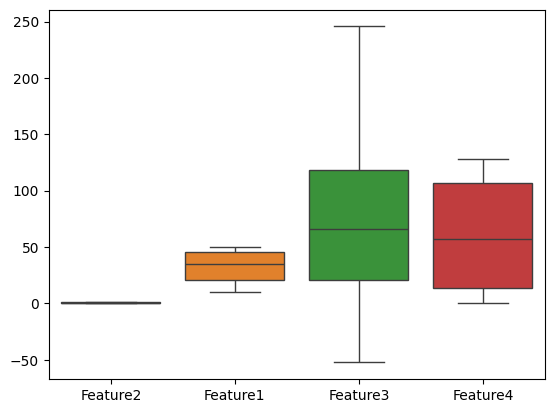

In [4135]:
sns.boxplot(test_csv)
plt.show()

There are no outliers in the testing data. Now I will standardize and scale the testing data.

In [4136]:
test_scaled = scaler.transform(test_csv.iloc[:, 1:])
test_csv.iloc[:, 1:] = test_scaled
test_csv

,Feature2,Feature1,Feature3,Feature4
0,0,-0.328764,-1.038125,-0.702715
1,0,-0.986056,-0.716557,-0.647113
2,0,0.498820,1.005214,1.130932
3,0,-1.127882,0.050173,-1.128599
4,0,1.289517,1.967032,1.501004
5,0,0.845019,0.127189,1.266443
6,0,-1.628262,-0.494018,-1.174115
7,1,0.913072,-0.099082,-0.708158
8,1,0.133745,-0.010799,-1.302861
9,1,1.435457,1.913249,-0.879224


POLYNOMIAL REGRESSION

In [4137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Polynomial Regression - Different Orders
orders = []
for i in range(1, 11):
    orders.append(i)

# Lists to store the errors and R2 scores
train_errors = []
test_errors = []
r2_score_list = []

for order in orders:
    # Create an instance of PolynomialFeatures with the specified degree
    poly_features = PolynomialFeatures(degree=order)
    X_train_poly = poly_features.fit_transform(X=X_train)
    X_test_poly = poly_features.transform(X=X_test)

    # Ridge regression
    # ridge_reg = Ridge(alpha=0.4)
    # ridge_reg.fit(X=X_train_poly, y=Y_train)

    # Elastic net regression
    # elastic_net_reg = ElasticNet(alpha=0.001, l1_ratio=0.00001)
    # elastic_net_reg.fit(X=X_train_poly, y=Y_train)

    # LASSO regression
    lasso_reg = Lasso(alpha=31.5)
    lasso_reg.fit(X=X_train_poly, y=Y_train)

    # y_pred = elastic_net_reg.predict(poly_features.transform(X=test_csv))
    # y_pred = ridge_reg.predict(poly_features.transform(X=test_csv))
    y_pred = lasso_reg.predict(poly_features.transform(X=test_csv))

    pred_Data = {
        'id': list(range(60)),
        'Label': y_pred
    }
    # df = pd.DataFrame(pred_Data)
    # df.to_csv(f'pred_for_order_{order}.csv', index=False)

    # print(f'Order = {order}, Training Elastic score = {elastic_net_reg.score(X=X_train_poly, y=Y_train)}, Testing Elastic score = {elastic_net_reg.score(X=X_test_poly, y=Y_test)}')
    # print(f'Order = {order}, Training Ridge score = {ridge_reg.score(X=X_train_poly, y=Y_train)}, Testing Ridge score = {ridge_reg.score(X=X_test_poly, y=Y_test)}')
    print(f'Order = {order}, Training Lasso score = {lasso_reg.score(X=X_train_poly, y=Y_train)}, Testing Lasso score = {lasso_reg.score(X=X_test_poly, y=Y_test)}')

Order = 1, Training Lasso score = 0.5384940573080613, Testing Lasso score = 0.7238580648689834
Order = 2, Training Lasso score = 0.7737633927894872, Testing Lasso score = 0.9432995022939552
Order = 3, Training Lasso score = 0.8874508902370976, Testing Lasso score = 0.9521963096833507
Order = 4, Training Lasso score = 0.9181540021913712, Testing Lasso score = 0.9019595739634082
Order = 5, Training Lasso score = 0.9402572024144773, Testing Lasso score = 0.8885878547333894
Order = 6, Training Lasso score = 0.9529386987702456, Testing Lasso score = 0.8744813203051176
Order = 7, Training Lasso score = 0.956626070851766, Testing Lasso score = 0.7645861475317053
Order = 8, Training Lasso score = 0.9606708328814445, Testing Lasso score = 0.8391069215267553
Order = 9, Training Lasso score = 0.9640910636028659, Testing Lasso score = 0.7945124733888126
Order = 10, Training Lasso score = 0.9649615907347917, Testing Lasso score = 0.7757382344149766


c:\Users\Valmik Belgaonkar\OneDrive\Desktop\IIITB Folder\5th Semester\Machine Learning\ML Lab\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.305e+05, tolerance: 4.261e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Valmik Belgaonkar\OneDrive\Desktop\IIITB Folder\5th Semester\Machine Learning\ML Lab\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+05, tolerance: 4.261e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Valmik Belgaonkar\OneDrive\Desktop\IIITB Folder\5th Semester\Machine Learning\ML Lab\.venv\Lib\site-packages\sklearn\linear_model\_coordi

In [4138]:
alpha_list = np.arange(49, 49.1, 0.001).tolist()
testing_score = []
for alpha in alpha_list:
    # Create an instance of PolynomialFeatures with the specified degree
    poly_features = PolynomialFeatures(degree=3)
    X_train_poly = poly_features.fit_transform(X=X_train)
    X_test_poly = poly_features.transform(X=X_test)

    # LASSO regression
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X=X_train_poly, y=Y_train)

    y_pred = lasso_reg.predict(poly_features.transform(X=test_csv))

    pred_Data = {
        'id': list(range(60)),
        'Label': y_pred
    }
    # df = pd.DataFrame(pred_Data)
    # df.to_csv(f'pred_for_order_3_alpha_{alpha}.csv', index=False)

    score = lasso_reg.score(X=X_test_poly, y=Y_test)
    testing_score.append(score)

    print(f'Order = 3, Training Lasso score = {lasso_reg.score(X=X_train_poly, y=Y_train)}, Testing Lasso score = {score}, alpha = {alpha}')

Order = 3, Training Lasso score = 0.8590258608527561, Testing Lasso score = 0.9553543269132534, alpha = 49.0
Order = 3, Training Lasso score = 0.8590241499035854, Testing Lasso score = 0.9553543091004222, alpha = 49.001
Order = 3, Training Lasso score = 0.8590224389194964, Testing Lasso score = 0.9553542912594115, alpha = 49.001999999999995
Order = 3, Training Lasso score = 0.8590207279004888, Testing Lasso score = 0.9553542733902216, alpha = 49.00299999999999
Order = 3, Training Lasso score = 0.8590190168465625, Testing Lasso score = 0.9553542554928524, alpha = 49.00399999999999
Order = 3, Training Lasso score = 0.8590173057577177, Testing Lasso score = 0.9553542375673036, alpha = 49.00499999999999
Order = 3, Training Lasso score = 0.8590155946339543, Testing Lasso score = 0.9553542196135756, alpha = 49.005999999999986
Order = 3, Training Lasso score = 0.8590138834752724, Testing Lasso score = 0.9553542016316683, alpha = 49.006999999999984
Order = 3, Training Lasso score = 0.859012172

Alpha vs Testing score: I will change the lower and upper limit of the alpha list and then plot the scatter plot to find a good alpha range. This process will be done iteratively.

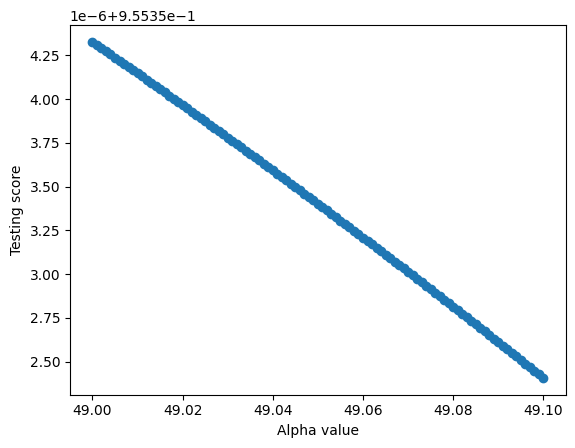

In [4139]:
plt.scatter(x=alpha_list, y=testing_score)
plt.xlabel('Alpha value')
plt.ylabel('Testing score')
plt.show()

In [4140]:
def submission_Func(alpha:float) -> None:
    # Create an instance of PolynomialFeatures with the specified degree
    poly_features = PolynomialFeatures(degree=3)
    X_train_poly = poly_features.fit_transform(X=X_train)
    # X_test_poly = poly_features.transform(X=X_test)

    # LASSO regression
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X=X_train_poly, y=Y_train)

    y_pred = lasso_reg.predict(poly_features.transform(X=test_csv))

    pred_Data = {
        'id': list(range(60)),
        'Label': y_pred
    }
    # df = pd.DataFrame(pred_Data)
    # df.to_csv(f'submission_{alpha}.csv', index=False)

    # Access the coefficients (weights)
    lasso_weights = lasso_reg.coef_
    lasso_intercept = lasso_reg.intercept_

    # View weights and intercept
    print("Lasso Coefficients (Weights):", lasso_weights)
    print("Lasso Intercept:", lasso_intercept)

    # For better readability, you might want to associate weights with feature names
    feature_names = poly_features.get_feature_names_out()
    weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': lasso_weights})
    print(weights_df)

In [4141]:
submission_Func(0.01)

Lasso Coefficients (Weights): [ 0.00000000e+00 -2.71401554e+01  1.35372489e+00  1.89528292e+02
  7.05347977e+01 -0.00000000e+00 -1.04710854e-02  9.27432995e+01
 -7.26991195e-02 -3.31326984e+01  6.48447186e+01  3.59206405e+01
  8.43294573e+01 -6.66071633e+01  1.16718877e+01 -1.85788796e-02
 -3.13752584e+01  0.00000000e+00 -8.37481351e+00  1.26504720e+01
 -6.33756409e+01 -2.02422864e+01  8.78718765e+01  2.73558525e+01
  1.26040294e+01 -8.18403004e-01 -1.37077350e+01 -5.43924055e+00
  6.79628893e+01  4.96204651e+01 -1.56966871e+00 -8.66902001e-01
 -8.83782465e+01  8.79302730e+00 -2.52206437e+01]
Lasso Intercept: 160.03306805529607
                       Feature      Weight
0                            1    0.000000
1                     Feature2  -27.140155
2                     Feature1    1.353725
3                     Feature3  189.528292
4                     Feature4   70.534798
5                   Feature2^2   -0.000000
6            Feature2 Feature1   -0.010471
7            Feature

Checking the weight of each feature is important to know which features are getting higher weights. I observed that 'Feature3' is getting the most weightage. Othe columns are getting weights very close to zero or equal to 0. Thus, to improve accuracy, the columns except 'Feature3' can be removed. Also, I noticed that degree 2 made my accuracy better than degree 3 polynomial regression.

In [4142]:
def super_submission_Func(alpha:float) -> None:
    modified_X_train = X_train.drop(columns=['Feature1', 'Feature2', 'Feature4'])
    poly_features = PolynomialFeatures(degree=2)
    X_train_poly = poly_features.fit_transform(X=modified_X_train)
    
    # LASSO regression
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X=X_train_poly, y=Y_train)

    modified_test_csv = test_csv.drop(columns=['Feature1', 'Feature2', 'Feature4'])
    print(modified_test_csv.head())
    y_pred = lasso_reg.predict(poly_features.transform(X=modified_test_csv))

    pred_Data = {
        'id': list(range(60)),
        'Label': y_pred
    }
    df = pd.DataFrame(pred_Data)
    df.to_csv(f'submission_super.csv', index=False)

In [4143]:
super_submission_Func(0.01)

   Feature3
0 -1.038125
1 -0.716557
2  1.005214
3  0.050173
4  1.967032
